### An analytical detective

Crime is an international concern, but it is documented and handled in very different ways in different countries. In the United States, violent crimes and property crimes are recorded by the Federal Bureau of Investigation (FBI).  Additionally, each city documents crime, and some cities release data regarding crime rates. The city of Chicago, Illinois releases crime data from 2001 onward online.

Chicago is the third most populous city in the United States, with a population of over 2.7 million people. The city of Chicago is shown in the map below, with the state of Illinois highlighted in red. 



![Title](ChicagoMap.png)

There are two main types of crimes: violent crimes, and property crimes. In this problem, we'll focus on one specific type of property crime, called "motor vehicle theft" (sometimes referred to as grand theft auto). This is the act of stealing, or attempting to steal, a car. In this problem, we'll use some basic data analysis in R to understand the motor vehicle thefts in Chicago. 

Please download the file mvtWeek1.csv for this problem (do not open this file in any spreadsheet software before completing this problem because it might change the format of the Date field). Here is a list of descriptions of the variables:

**ID**: a unique identifier for each observation

**Date**: the date the crime occurred

**LocationDescription**: the location where the crime occurred

Arrest: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made)

Domestic: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic)

Beat: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.

District: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.

CommunityArea: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.

Year: the year in which the crime occurred.

Latitude: the latitude of the location at which the crime occurred.

Longitude: the longitude of the location at which the crime occurred.

In [ ]:
Read Pakeage

In [1]:
import pandas as pd

#### Problem 1.1 - Loading the Data

Read the dataset mvtWeek1.csv into R, using the read.csv function, and call the data frame "mvt". Remember to navigate to the directory on your computer containing the file mvtWeek1.csv first. It may take a few minutes to read in the data, since it is pretty large. Then, use the str and summary functions to answer the following questions.

How many rows of data (observations) are in this dataset? : 191.641

In [2]:
mvt = pd.read_csv('mvtWeek1.csv')
mvt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   191641 non-null  int64  
 1   Date                 191641 non-null  object 
 2   LocationDescription  191641 non-null  object 
 3   Arrest               191641 non-null  bool   
 4   Domestic             191641 non-null  bool   
 5   Beat                 191641 non-null  int64  
 6   District             148589 non-null  object 
 7   CommunityArea        167038 non-null  object 
 8   Year                 191641 non-null  int64  
 9   Latitude             189365 non-null  float64
 10  Longitude            189365 non-null  float64
dtypes: bool(2), float64(2), int64(3), object(4)
memory usage: 13.5+ MB


C:\Users\USER\AppData\Local\Temp\ipykernel_12476\3847133254.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  mvt = pd.read_csv('mvtWeek1.csv')


#### Problem 1.2 - Loading the Data
How many rows of data (observations) are in this dataset?

In [4]:
len(mvt)

191641

#### Problem 1.3 - Loading the Data

Using the "max" function, what is the maximum value of the variable "ID"?

In [5]:
max(mvt.ID)

9181151

#### Problem 1.4 - Loading the Data

What is the minimum value of the variable "Beat"?

In [6]:
min(mvt.Beat)

111

#### Problem 1.5 - Loading the Data

How many observations have value TRUE in the Arrest variable (this is the number of crimes for which an arrest was made)?

In [7]:
sum(mvt.Arrest)

15536

#### Problem 1.6 - Loading the Data

How many observations have a LocationDescription value of ALLEY?

In [8]:
mvt.LocationDescription.value_counts()

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
                                   ...  
AIRPORT EXTERIOR - SECURE AREA         1
JAIL / LOCK-UP FACILITY                1
CTA TRAIN                              1
APPLIANCE STORE                        1
ANIMAL HOSPITAL                        1
Name: LocationDescription, Length: 78, dtype: int64

In [12]:
mvt[mvt['LocationDescription'] == 'ALLEY'].shape[0]

2308

In [13]:
mvt.describe()

,ID,Beat,Year,Latitude,Longitude
count,1.916410e+05,191641.000000,191641.000000,189365.000000,189365.000000
mean,4.968629e+06,1258.810771,2006.134940,41.844555,-87.677782
std,2.342997e+06,702.530465,3.520285,0.085583,0.057333
min,1.310022e+06,111.000000,2001.000000,41.644710,-87.925510
25%,2.832144e+06,722.000000,2003.000000,41.771618,-87.718474
50%,4.762956e+06,1121.000000,2006.000000,41.850029,-87.677597
75%,7.201878e+06,1733.000000,2009.000000,41.917116,-87.635513
max,9.181151e+06,2535.000000,2012.000000,42.022878,-87.524676


#### Problem 2.1 - Understanding Dates in R

In many datasets, like this one, you have a date field. Unfortunately, R does not automatically recognize entries that look like dates. We need to use a function in R to extract the date and time. Take a look at the first entry of Date (remember to use square brackets when looking at a certain entry of a variable).

In what format are the entries in the variable Date?

In [22]:
mvt.Date[10000]

'4/17/12 11:30'

In [23]:
mvt.iloc[10000,]

ID                           8571944
Date                   4/17/12 11:30
LocationDescription           STREET
Arrest                         False
Domestic                       False
Beat                            1834
District                          18
CommunityArea                      8
Year                            2012
Latitude                   41.891133
Longitude                 -87.619158
Name: 10000, dtype: object

Month/Day/Year Hour:Minute 

#### Problem 2.2 - Understanding Dates in R

Now, let's convert these characters into a Date object in R. In your R console, type

DateConvert = as.Date(strptime(mvt$Date, "%m/%d/%y %H:%M"))

This converts the variable "Date" into a Date object in R. Take a look at the variable DateConvert using the summary function.

What is the month and year of the median date in our dataset? Enter your answer as "Month Year", without the quotes. (Ex: if the answer was 2008-03-28, you would give the answer "March 2008", without the quotes.)

In [24]:
mvt['Date'] = pd.to_datetime(mvt['Date'], format='%m/%d/%y %H:%M')


In [26]:
mvt['Date'].describe(datetime_is_numeric=True)

count                           191641
mean     2006-08-23 13:45:08.905714176
min                2001-01-01 00:01:00
25%                2003-07-10 18:00:00
50%                2006-05-21 12:30:00
75%                2009-10-24 22:40:00
max                2012-12-31 23:15:00
Name: Date, dtype: object

In [ ]:
DateConvert = mvt['Date'].describe(datetime_is_numeric=True)

In [23]:
summary(DateConvert)

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2001-01-01" "2003-07-10" "2006-05-21" "2006-08-23" "2009-10-24" "2012-12-31"

#### Problem 2.3 - Understanding Dates in R

Now, let's extract the month and the day of the week, and add these variables to our data frame mvt. We can do this with two simple functions. Type the following commands in R:

mvt$Month = months(DateConvert)

mvt$Weekday = weekdays(DateConvert)

This creates two new variables in our data frame, Month and Weekday, and sets them equal to the month and weekday values that we can extract from the Date object. Lastly, replace the old Date variable with DateConvert by typing:

mvt$Date = DateConvert

Using the table command, answer the following questions.

In which month did the fewest motor vehicle thefts occur?

In [29]:
mvt['Month'] = mvt['Date'].dt.month_name()

mvt['Month'].head()

0    December
1    December
2    December
3    December
4    December
Name: Month, dtype: object

In [32]:
mvt['Weekday'] = mvt['Date'].dt.day_name()

mvt['Weekday'].head()



0    Monday
1    Monday
2    Monday
3    Monday
4    Monday
Name: Weekday, dtype: object

In [37]:
mvt['Month'].value_counts()

October      17086
July         16801
August       16572
December     16426
November     16063
September    16060
January      16047
May          16035
June         16002
March        15758
April        15280
February     13511
Name: Month, dtype: int64

In [44]:
mvt_Month = mvt['Month'].value_counts()

In [38]:
min(mvt['Month'].value_counts())

13511

In [41]:
mvt['Month'].value_counts().min()

13511

In [45]:
mvt_Month[mvt_Month == mvt_Month.min()]

February    13511
Name: Month, dtype: int64

#### Problem 2.4 - Understanding Dates in R

On which weekday did the most motor vehicle thefts occur?

In [46]:
mvt_Weekday = mvt['Weekday'].value_counts()

In [47]:
mvt_Weekday[mvt_Weekday == mvt_Weekday.max()]

Friday    29284
Name: Weekday, dtype: int64

In [48]:
mvt_Weekday

Friday       29284
Wednesday    27416
Monday       27397
Thursday     27319
Saturday     27118
Tuesday      26791
Sunday       26316
Name: Weekday, dtype: int64

#### Problem 2.5 - Understanding Dates in R

Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made?

In [52]:
cross_tab1 = pd.crosstab(mvt['Month'], mvt['Arrest'])
cross_tab1

Arrest,False,True
Month,,
April,14028,1252
August,15243,1329
December,15029,1397
February,12273,1238
January,14612,1435
July,15477,1324
June,14772,1230
March,14460,1298
May,14848,1187


In [58]:
mvt.groupby([mvt['Month'], mvt['Arrest']])['Month'].count()

Month      Arrest
April      False     14028
           True       1252
August     False     15243
           True       1329
December   False     15029
           True       1397
February   False     12273
           True       1238
January    False     14612
           True       1435
July       False     15477
           True       1324
June       False     14772
           True       1230
March      False     14460
           True       1298
May        False     14848
           True       1187
November   False     14807
           True       1256
October    False     15744
           True       1342
September  False     14812
           True       1248
Name: Month, dtype: int64

In [60]:
cross_tab1[True].max()

1435

In [61]:
 cross_tab1[cross_tab1[True] == cross_tab1[True].max()].index.tolist()


['January']

#### Problem 3.1 - Visualizing Crime Trends

Now, let's make some plots to help us better understand how crime has changed over time in Chicago. Throughout this problem, and in general, you can save your plot to a file. For more information, [this website very](https://www.stat.berkeley.edu/~s133/saving.html) clearly explains the process.

First, let's make a histogram of the variable Date. We'll add an extra argument, to specify the number of bars we want in our histogram. In your R console, type

hist(mvt$Date, breaks=100)

Looking at the histogram, answer the following questions.



<Axes: >

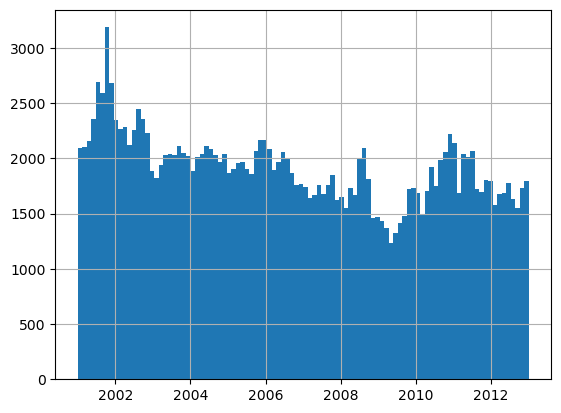

In [64]:
mvt['Date'].hist(bins=100)

In general, does it look like crime increases or decreases from 2002 - 2012?

Decreases

In general, does it look like crime increases or decreases from 2005 - 2008?




Decreases

In general, does it look like crime increases or decreases from 2009 - 2011?




Increases

##### Problem 3.2 - Visualizing Crime Trends

Now, let's see how arrests have changed over time. Create a boxplot of the variable "Date", sorted by the variable "Arrest" (if you are not familiar with boxplots and would like to learn more, check out this [tutorial](https://www.r-bloggers.com/box-plot-with-r-tutorial/)). In a boxplot, the bold horizontal line is the median value of the data, the box shows the range of values between the first quartile and third quartile, and the whiskers (the dotted lines extending outside the box) show the minimum and maximum values, excluding any outliers (which are plotted as circles). Outliers are defined by first computing the difference between the first and third quartile values, or the height of the box. This number is called the Inter-Quartile Range (IQR). Any point that is greater than the third quartile plus the IQR or less than the first quartile minus the IQR is considered an outlier.

Does it look like there were more crimes for which arrests were made in the first half of the time period or the second half of the time period? (Note that the time period is from 2001 to 2012, so the middle of the time period is the beginning of 2007.)

In [68]:
mvt['DaysSinceMin'] = (mvt['Date'] - mvt['Date'].min()).dt.days

mvt['DaysSinceMin']

0         4382
1         4382
2         4382
3         4382
4         4382
          ... 
191636       0
191637       0
191638       0
191639       0
191640       0
Name: DaysSinceMin, Length: 191641, dtype: int64

In [72]:
mvt['Year'] = mvt['Date'].dt.year

<Axes: title={'center': 'Year'}, xlabel='Arrest'>

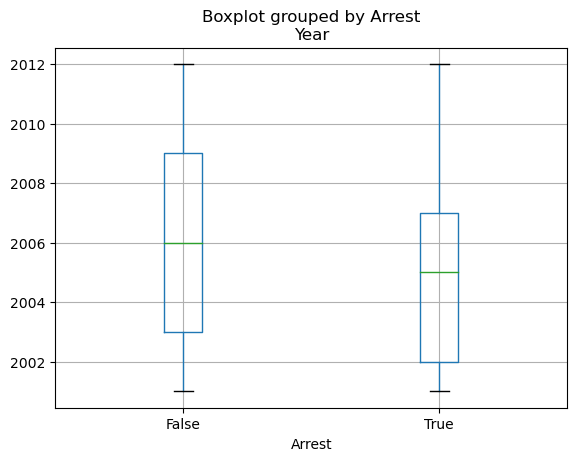

In [73]:
mvt.boxplot(column='Year', by='Arrest')

#### Problem 3.3 - Visualizing Crime Trends

Let's investigate this further. Use the table function for the next few questions.

For what proportion of motor vehicle thefts in 2001 was an arrest made?

Note: in this question and many others in the course, we are asking for an answer as a proportion. Therefore, your answer should take a value between 0 and 1.

In [74]:
crosstab2 = pd.crosstab(mvt['Year'], mvt['Arrest'])
crosstab2

Arrest,False,True
Year,,
2001,18517,2152
2002,16638,2115
2003,14859,1798
2004,15169,1693
2005,14956,1528
2006,14796,1302
2007,13068,1212
2008,13425,1020
2009,11327,840


In [76]:
proportion_table = crosstab2.div(crosstab2.sum(axis=1), axis=0)

In [77]:
proportion_table

Arrest,False,True
Year,,
2001,0.895883,0.104117
2002,0.887218,0.112782
2003,0.892057,0.107943
2004,0.899597,0.100403
2005,0.907304,0.092696
2006,0.919120,0.080880
2007,0.915126,0.084874
2008,0.929387,0.070613
2009,0.930961,0.069039


0.10411728

Problem 3.4 - Visualizing Crime Trends
1 punto posible (calificado)
For what proportion of motor vehicle thefts in 2007 was an arrest made?

0.08487395

#### Problem 3.5 - Visualizing Crime Trends

For what proportion of motor vehicle thefts in 2012 was an arrest made?

0.03902924

<Axes: xlabel='Year'>

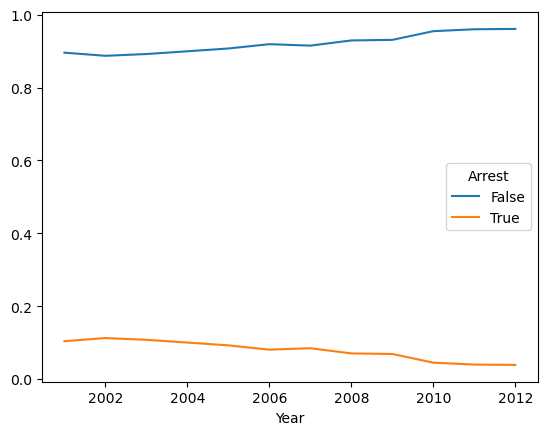

In [78]:
proportion_table.plot()

Since there may still be open investigations for recent crimes, this could explain the trend we are seeing in the data. There could also be other factors at play, and this trend should be investigated further. However, since we don't know when the arrests were actually made, our detective work in this area has reached a dead end.

#### Problem 4.1 - Popular Locations

Analyzing this data could be useful to the Chicago Police Department when deciding where to allocate resources. If they want to increase the number of arrests that are made for motor vehicle thefts, where should they focus their efforts?

We want to find the top five locations where motor vehicle thefts occur. If you create a table of the LocationDescription variable, it is unfortunately very hard to read since there are 78 different locations in the data set. By using the sort function, we can view this same table, but sorted by the number of observations in each category. In your R console, type:

sort(table(mvt$LocationDescription))

Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category? You should select 5 of the following options.

In [81]:
location_counts = mvt['LocationDescription'].value_counts()
top_6_locations = location_counts.head(6)
top_6_locations

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

#### Problem 4.2 - Popular Locations

Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5". To do this, you can use the | symbol. In lecture, we used the & symbol to use two criteria to make a subset of the data. To only take observations that have a certain value in one variable or the other, the | character can be used in place of the & symbol. This is also called a logical "or" operation.

Alternately, you could create five different subsets, and then merge them together into one data frame using rbind.

How many observations are in Top5?

In [84]:
locations_of_interest = [
    'STREET',
    'PARKING LOT/GARAGE(NON.RESID.)',
    'ALLEY',
    'GAS STATION',
    'DRIVEWAY - RESIDENTIAL'
]

Top5 = mvt[mvt['LocationDescription'].isin(locations_of_interest)]


len(Top5)

177510

#### Problem 4.3 - Popular Locations

R will remember the other categories of the LocationDescription variable from the original dataset, so running table(Top5$LocationDescription) will have a lot of unnecessary output. To make our tables a bit nicer to read, we can refresh this factor variable. In your R console, type:

Top5$LocationDescription = factor(Top5$LocationDescription)

If you run the str or table function on Top5 now, you should see that LocationDescription now only has 5 values, as we expect.

Use the Top5 data frame to answer the remaining questions.

One of the locations has a much higher arrest rate than the other locations. Which is it? Please enter the text in exactly the same way as how it looks in the answer options for Problem 4.1.

In [85]:
Top5['LocationDescription'] = Top5['LocationDescription'].astype('category')


C:\Users\USER\AppData\Local\Temp\ipykernel_12476\1879323793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top5['LocationDescription'] = Top5['LocationDescription'].astype('category')


In [87]:
Top5.LocationDescription.value_counts()

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [91]:
crosstab3 = pd.crosstab(mvt['LocationDescription'], mvt['Arrest'])

In [94]:
crosstab3

Arrest,False,True
LocationDescription,,
ABANDONED BUILDING,4,0
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,4,0
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,1,0
AIRPORT EXTERIOR - NON-SECURE AREA,18,6
AIRPORT EXTERIOR - SECURE AREA,1,0
...,...,...
TAXICAB,18,3
VACANT LOT/LAND,918,67
VEHICLE NON-COMMERCIAL,758,59


In [92]:
prop_table2 = crosstab3.div(crosstab3.sum(axis=1), axis=0)

In [93]:
prop_table2

Arrest,False,True
LocationDescription,,
ABANDONED BUILDING,1.000000,0.000000
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,1.000000,0.000000
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,1.000000,0.000000
AIRPORT EXTERIOR - NON-SECURE AREA,0.750000,0.250000
AIRPORT EXTERIOR - SECURE AREA,1.000000,0.000000
...,...,...
TAXICAB,0.857143,0.142857
VACANT LOT/LAND,0.931980,0.068020
VEHICLE NON-COMMERCIAL,0.927785,0.072215


In [98]:
prop_table2[True].max()

0.6

In [99]:
prop_table2[prop_table2[True] == prop_table2[True].max()]

Arrest,False,True
LocationDescription,,
AIRPORT VENDING ESTABLISHMENT,0.4,0.6


In [101]:
crosstab4 = pd.crosstab(Top5['LocationDescription'], Top5['Arrest'])

In [102]:
prop_table3 = crosstab4.div(crosstab4.sum(axis=1), axis=0)
prop_table3[prop_table3[True] == prop_table3[True].max()]

Arrest,False,True
LocationDescription,,
GAS STATION,0.792042,0.207958


#### Problem 4.4 - Popular Locations

On which day of the week do the most motor vehicle thefts at gas stations happen?

In [103]:
pd.crosstab(Top5[Top5['LocationDescription'] == 'GAS STATION']['LocationDescription'] , Top5['Weekday'] )

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
LocationDescription,,,,,,,
GAS STATION,332,280,338,336,282,270,273


#### Problem 4.5 - Popular Locations

On which day of the week do the fewest motor vehicle thefts in residential driveways happen?

In [104]:
pd.crosstab(Top5[Top5['LocationDescription'] == 'DRIVEWAY - RESIDENTIAL']['LocationDescription'] , Top5['Weekday'] )

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
LocationDescription,,,,,,,
DRIVEWAY - RESIDENTIAL,257,255,202,221,263,243,234
